In [15]:
import os
import re
import pandas as pd
from glob import glob
import cv2
from tqdm import tqdm

In [8]:
ROOT = f'../input/BenthamDatasetR0-GT'

In [13]:
train_ids = open(f'{ROOT}/Partitions/TrainLines.lst', 'r').read().strip().split('\n')
valid_ids = open(f'{ROOT}/Partitions/ValidationLines.lst', 'r').read().strip().split('\n')
test_ids = open(f'{ROOT}/Partitions/TestLines.lst', 'r').read().strip().split('\n')

len(train_ids), len(valid_ids), len(test_ids)

(9198, 1415, 860)

text: -ty or untill his Majesty shall direct the return of such Offender
image_shape: (115, 1672, 3)


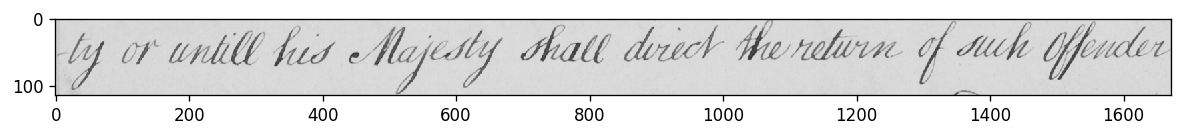

In [14]:
import matplotlib.pyplot as plt

idx = 777

sample_id = valid_ids[idx]
text = open(f'{ROOT}/Transcriptions/{sample_id}.txt', 'r').read().strip()
image = cv2.imread(f'{ROOT}/Images/Lines/{sample_id}.png')

print('text:', text)
print('image_shape:', image.shape)

plt.figure(num=None, figsize=(12, 3), dpi=120, facecolor='w', edgecolor='k')
plt.imshow(image);

In [ ]:
!mkdir ./input/bentham
!mkdir ./input/bentham/images

In [30]:
marking = []

for sample_id in tqdm(train_ids + valid_ids + test_ids):
    text = open(f'{ROOT}/Transcriptions/{sample_id}.txt', 'r').read().strip()
    stage = 'train'
    if sample_id in valid_ids:
        stage = 'valid'
    elif sample_id in test_ids:
        stage = 'test'
    marking.append({
        'sample_id': sample_id,
        'text': text,
        'path': f'bentham/images/{sample_id}.png',
        'stage': stage
    })
    


marking = pd.DataFrame(marking).set_index('sample_id')
marking.head()

100%|██████████| 11473/11473 [00:01<00:00, 9661.04it/s] 


,text,path,stage
sample_id,,,
071_167_001_01_01,29,bentham/images/071_167_001_01_01.png,train
071_167_001_02_01,C,bentham/images/071_167_001_02_01.png,train
071_167_001_03_01,Frauds relative to the Coin .,bentham/images/071_167_001_03_01.png,train
071_167_001_04_01,"Seal unbroken , the Judge appealed from shall ...",bentham/images/071_167_001_04_01.png,train
071_167_001_04_02,p,bentham/images/071_167_001_04_02.png,train


In [31]:
marking['stage'].value_counts()

train    9198
valid    1415
test      860
Name: stage, dtype: int64

In [27]:
%%time

!cp ../input/BenthamDatasetR0-GT/Images/Lines/*.png ./input/bentham/images/

CPU times: user 103 ms, sys: 20.9 ms, total: 124 ms
Wall time: 4.93 s


sample_id: 115_075_003_02_09
text: 1/3 of which allowance of 1 a day may be retained by such
image_shape: (119, 1598, 3)


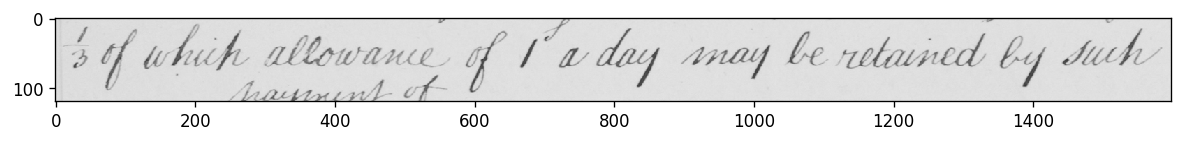

In [36]:
import matplotlib.pyplot as plt

idx = 777

sample = marking.iloc[idx]
text = sample['text']
image = cv2.imread(f'./input/{sample["path"]}')

print('sample_id:', sample.name)
print('text:', text)
print('image_shape:', image.shape)

plt.figure(num=None, figsize=(12, 3), dpi=120, facecolor='w', edgecolor='k')
plt.imshow(image);

In [37]:
marking.to_csv('./input/bentham/marking.csv')